# Cálculo Numérico - 2021.2 - Tarefa 6 - Professor João Paixão
## Realizado por: David Rodrigues Albuquerque - 120047390
## Questões discutidas com: Beatriz Almeida Ramos, Matheus Barroso
## Questões 1) e 3) realizadas com: Beatriz Almeira Ramos, Matheus Barroso

In [167]:
using Plots
using LinearAlgebra
using Polynomials

# Exercício 1)

## I) Resolve_Diagonal

In [168]:
# Entrada matriz A e b
# Saida true  se a matriz A eh quadrada e se o numero de linhas da matriz B eh o mesmo numero de colunas da matriz A. False, caso contrario
# Verifica se a matriz A eh quadrada e se o numero de linhas da matriz B eh o mesmo numero de colunas da matriz A.
function verifica_tamanho(A,b)
    if (size(A)[1] != size(A)[2]) # Verificando se a matriz eh quadrada
        println("ERRO! Matriz A nao eh quadrada")
        return false
    end

    if (size(b)[1] != size(A)[2]) # Verificando se o numero de linhas de B eh o mesmo que de colunas de A
        println("ERRO! O numero de linhas da matriz B não eh o mesmo do numero de colunas da matriz A")
        return false
    end
    
    return true
end

verifica_tamanho (generic function with 1 method)

In [169]:
# Entrada matriz A e b
# Saída x tal que A * x = b
# Onde A é a matriz em que a diagonal principal tem elementos diferentes de 0 e o restante dos elementos
# possuem valor 0, a funcao a seguir resolver esse caso.
function sistema_diagonal(A,b)
    # inicializacao de variaveis  
    n,=size(A)
    x = zeros(n, 1)
  
    if (!verifica_tamanho(A,b))
      return "ERRO"
    end
    
    for i in 1:n
      x[i] = b[i]/A[i,i] # Expressao que calcula  A * x = b
    end
  return x
  end

sistema_diagonal (generic function with 1 method)

In [170]:
# Exemplo 1
A= [2 0 0;0 5 0;0 0 7]
x_verdadeiro=randn(3,1)
b=A*x_verdadeiro
x_calculado=sistema_diagonal(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14


true

In [171]:
# Exemplo 2
A= [342 0 0;0 12132 0;0 0 777]
x_verdadeiro=randn(3,1)
b=A*x_verdadeiro
x_calculado=sistema_diagonal(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14

true

In [172]:

# Exemplo 3
A= [423 0 0 0;0 4383 0 0;0 0 5 0; 0 0 0 9997]
x_verdadeiro=randn(4,1)
b=A*x_verdadeiro
x_calculado=sistema_diagonal(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14

true

## II) Resolve_Triangular_Superior

In [173]:
# Entrada matriz A e b
# Saída x tal que A * x = b
# Onde A é triangular superior aonde os elementos da diagonal são diferentes de zero e a parte inferior, por sua vez, eh composta por zeros
function sistema_triangular_superior(A,b) 
  # inicializacao de variaveis
  n,=size(A) 
  x = zeros(n, 1)
  #verificação de erro no tamanho das matrizes
  if (!verifica_tamanho(A,b))
    return "ERRO"
  end

  for i in reverse(1:n) # comecamos da ultima linha da matriz, o percorrendo "de baixo para cima"
    #na pratica isolamos a incognita da linha i, para descobrir o seu valor
    #como comecamos na ultima linha, a variavel dessa linha ja tem seu valor conhecido
    #a partir da penultima linha, as variaveis tem seus valores baseados na linha abaixo que áforam calculados. 
    soma = 0
    for j in i+1:n
        soma+=A[i, j]*x[j]
    end 
    x[i] = (b[i] - soma)/(A[i,i])
  end
return x
end


sistema_triangular_superior (generic function with 1 method)

In [174]:
# Exemplo 1
A= [2 3 4;0 5 7;0 0 9]
x_verdadeiro=randn(3,1)
b=A*x_verdadeiro
x_calculado=sistema_triangular_superior(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14


true

In [175]:
# Exemplo 2
A= [342 455 555;0 121 733;0 0 777]
x_verdadeiro=randn(3,1)
b=A*x_verdadeiro
x_calculado=sistema_triangular_superior(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14

true

In [176]:

# Exemplo 3
A= [423 834 -342 545;0 72 12 -14;0 0 4 5; 0 0 0 1]
x_verdadeiro=randn(4,1)
b=A*x_verdadeiro
x_calculado=sistema_triangular_superior(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14

true

## III) Resolve_Triangular_Inferior

In [177]:
# Entrada matriz A e b
# Saida x tal que A * x = b
# onde A eh triangular inferior aonde os elementos da diagonal sao diferentes de zero e a parte superior, por sua vez, eh composta de zeros
function sistema_triangular_inferior(A,b) #
  # inicializacao de variaveis
  n,=size(A)
  x = zeros(n, 1)

  if (!verifica_tamanho(A,b))
    return "ERRO"
  end

  for i in 1:n
    soma = 0

    # comecamos da ultima linha da matriz, a percorrendo "de baixo para cima"
    #na pratica isolamos a incognita da linha i, para descobrir o seu valor
    #como comecamos na ultima linha, a variavel dessa linha ja tem seu valor conhecido
    #a partir da penultima linha, as variaveis tem seus valores baseados na linha abaixo que já foram calculados.     
    for j in 1:i-1
        soma+=A[i, j]*x[j]
    end 
    x[i] = (b[i] - soma)/(A[i,i])
  end
return x
end

sistema_triangular_inferior (generic function with 1 method)

In [178]:
# Exemplo 1
A= [4 0 0;5 7 0;2 3 9]
x_verdadeiro=randn(3,1)
b=A*x_verdadeiro
x_calculado=sistema_triangular_inferior(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14


true

In [179]:
# Exemplo 2
A= [342 0 0;645 121 0;455 666 777]
x_verdadeiro=randn(3,1)
b=A*x_verdadeiro
x_calculado=sistema_triangular_inferior(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14

true

In [180]:
# Exemplo 3
A= [423 0 0 0;150 72 0 0;42 24 543 0; 143 1312 10 11]
x_verdadeiro=randn(4,1)
b=A*x_verdadeiro
x_calculado=sistema_triangular_inferior(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14

true

## IV) Decomposição_LU

In [181]:
# Entrada: matriz A
# Saida: L, matriz triangular inferior de A e U matriz triangular superior de A
# Fazemos a decomposicao da matriz A em duas matrizes L e U, tal que A = L * U
function lu(A)
    n,=size(A)
    U = copy(A)
    L = zeros(n, n)

    for i in 1:n-1 # for por coluna
        pivot = U[i,i]
        L[i,i] = 1
        for j in i+1:n # for da linha
            fator = U[j,i]/pivot;
            L[j,i] = fator
            for k in 1:n # for pra calcular o valor da linha
                U[j, k] -= fator * U[i,k] # calcula linha
            end
        end
    end

    L[n,n] = 1
    
    return L,U
end

            

lu (generic function with 1 method)

In [182]:
function sistema_denso(A,b)
    #verificação de erro no tamanho das matrizes
    if (!verifica_tamanho(A,b))
        return "ERRO"
    end

    # chamamos a decomposicao de A em L e U
    L,U=lu(A)
    
    y=sistema_triangular_inferior(L,b)
    x=sistema_triangular_superior(U,y)
    return x
end

sistema_denso (generic function with 1 method)

In [183]:
# Exemplo 1
A = [2.0 4.0 3.0; 4.0 10.0 9.0; 6.0 18.0 22.0]
lu(A)

([1.0 0.0 0.0; 2.0 1.0 0.0; 3.0 3.0 1.0], [2.0 4.0 3.0; 0.0 2.0 3.0; 0.0 0.0 4.0])

In [184]:
# Exemplo 2
A = [21.0 48.0 34.0; 46.0 10.0 91.0; 68.0 18.0 25.0]
lu(A)

([1.0 0.0 0.0; 2.1904761904761907 1.0 0.0; 3.238095238095238 1.4444444444444444 1.0], [21.0 48.0 34.0; -7.105427357601002e-15 -95.14285714285715 16.52380952380952; 1.0263395072090336e-14 0.0 -108.96296296296296])

In [185]:
# Exemplo 3
A = [2.0 23.0 41.0; 10.0 11.0 12.0; 6.0 5.0 1.0]
lu(A)

([1.0 0.0 0.0; 5.0 1.0 0.0; 3.0 0.6153846153846154 1.0], [2.0 23.0 41.0; 0.0 -104.0 -193.0; 0.0 0.0 -3.2307692307692264])

In [186]:
# Exemplo 1
A = [2.0 4.0 3.0; 4.0 10.0 9.0; 6.0 18.0 22.0]
x_verdadeiro=randn(3,1)
b=A*x_verdadeiro
x_calculado = sistema_denso(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14

true

In [187]:
# Exemplo 2
A = [21.0 48.0 34.0; 46.0 10.0 91.0; 68.0 18.0 25.0]
x_verdadeiro=randn(3,1)
b=A*x_verdadeiro
x_calculado = sistema_denso(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14

true

In [188]:
# Exemplo 3
A = [2.0 23.0 41.0; 10.0 11.0 12.0; 6.0 5.0 1.0]
x_verdadeiro=randn(3,1)
b=A*x_verdadeiro
x_calculado = sistema_denso(A,b)
norm(x_verdadeiro - x_calculado) < 10^-14

false

## V) Inversa + Complexidade

Ao resolvemos o sistema de equações, b normalmente é tratado como um vetor

Sabemos, por definição, que

$$Ax = b$$
$$LUx = (Ux) = b$$

Sabemos também que, ao multiplicarmos uma matriz pela sua matriz inversa, obtemos a matriz identidade. Portanto, se colocarmos no algoritmo para resolver o sistema denso que a matriz $A$ e $b$, a matriz identidade, o $x$ retornado será uma coluna da matriz inversa de $A$. Com isto, como para cada linha da matriz de $b$, podemos iterar as linhas da matriz $b$ para obtermos cada coluna da matriz inversa $x$.

A complexidade do algoritmo é O de n³. Isso porque fazemos um for até n para passar por cada linha da matriz identidade e a passamos para o sitema triangular inferior, que por sua vez tem complexidade o n², assim temos n*n² igual a n³. 

In [189]:
function matriz_inversa(A)
    n,=size(A)
    b = zeros(n, n)
    inverse = zeros(n,n)

    #verificação de erro no tamanho das matrizes
    if (!verifica_tamanho(A,b))
        return "ERRO"
    end

    for i in 1:n
        b[i,i] = 1
    end

    # chamamos a decomposicao de A em L e U
    L,U=lu(A)
    for i in 1:n
        y=sistema_triangular_inferior(L,b[i,:])
        x=sistema_triangular_superior(U,y)
        inverse[[i],:]=x
    end
    
    return inverse'
end

matriz_inversa (generic function with 1 method)

In [190]:
# Exemplo 1
A = [1.0 2.0 2.0; 4.0 5.0 6.0; 7.0 8.0 9.0]
x_calculado = matriz_inversa(A)

3×3 Adjoint{Float64,Array{Float64,2}}:
 -1.0  -0.666667   0.666667
  2.0  -1.66667    0.666667
 -1.0   2.0       -1.0

In [191]:
# Exemplo 2
A = [8.0 4.0 7.0; 10.0 6.0 20.0; 27.0 18.0 89.0]
x_calculado = matriz_inversa(A)

3×3 Adjoint{Float64,Array{Float64,2}}:
  1.47458   -1.94915    0.322034
 -2.9661     4.4322    -0.762712
  0.152542  -0.305085   0.0677966

In [192]:
# Exemplo 3
A = [4.0 3.0 7.0; 1.0 6.0 15.0; 20.0 18.0 25.0]
x_calculado = matriz_inversa(A)

3×3 Adjoint{Float64,Array{Float64,2}}:
  0.325203  -0.138211   -0.00813008
 -0.745257   0.108401    0.143631
  0.276423   0.0325203  -0.0569106

# Exercício 2a)

Dado o PVC $y''(x) = 4x$, $y(0) = 5$ e $y(10) = 20$, devemos determinar um sistema linear que aproxima pelo método de diferenças finitas com 6 intervalos ($n = 6$). Com isto, como já possuímos os valores das pontas, devemos montar um sistema $5x5$ para descobrir os valores $y_{2}, y_{3}, y_{4}, y_{5}$ e $y_{6}$.


Desta forma, teremos que

$$y'' = 4x$$
$$x_{2} = 4x = 4x_{2} \approx \dfrac{y_{3} - 2y_{2} + y_{1}}{2h^2}$$
$$x_{3} = 4x = 4x_{2} \approx \dfrac{y_{4} - 2y_{3} + y_{2}}{2h^2}$$
$$x_{4} = 4x = 4x_{2} \approx \dfrac{y_{5} - 2y_{4} + y_{3}}{2h^2}$$
$$x_{5} = 4x = 4x_{2} \approx \dfrac{y_{6} - 2y_{5} + y_{4}}{2h^2}$$
$$x_{6} = 4x = 4x_{2} \approx \dfrac{y_{7} - 2y_{6} + y_{5}}{2h^2}$$

Podemos então descrever o seguinte sistema

$$
\begin{cases}
y_{3} - 2y_{2} = y''_{2} * 2h^2 - y_{1} \\
y_{4} - 2y_{3} + y''_{3} * y_{2} = 2h^2 \\
y_{5} - 2y_{4} + y''_{4} * y_{3} = 2h^2 \\
y_{6} - 2y_{5} + y''_{5} * y_{4} = 2h^2 \\
-2y_{6} + y_{5} = y''_{6} * 2h^2 - y_{7} \\
\end{cases}
$$

Desta forma, teremos que resolver tal que

$$
\begin{bmatrix}
-2 & 1 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 \\
0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 1 & -2 \\
\end{bmatrix} 
\begin{bmatrix}
y_{2} \\
y_{3} \\
y_{4} \\
y_{5} \\
y_{6} \\
\end{bmatrix} 
=
\begin{bmatrix}
y''_{2} * 2h^2 - y_{1} \\
y''_{3} * 2h^2 \\
y''_{4} * 2h^2 \\
y''_{5} * 2h^2 \\
y''_{6} * 2h^2 - y_{7}\\
\end{bmatrix}
$$



# Exercício 2b)

Com o sistema em mãos, tal que

$$
\begin{bmatrix}
-2 & 1 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 \\
0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 1 & -2 \\
\end{bmatrix} 
\begin{bmatrix}
y_{2} \\
y_{3} \\
y_{4} \\
y_{5} \\
y_{6} \\
\end{bmatrix} 
=
\begin{bmatrix}
y''_{2} * 2h^2 - y_{1} \\
y''_{3} * 2h^2 \\
y''_{4} * 2h^2 \\
y''_{5} * 2h^2 \\
y''_{6} * 2h^2 - y_{7}\\
\end{bmatrix}
$$

podemos chamar o método dsa diferenças finitas construído em aula com os parâmetros do exercício.

In [193]:
# Função para criar a primeira matriz
function criação_da_matriz(n)
    A=zeros(n,n)
    
    #"manual"
    A[1,1]=-2
    A[1,2]=1
    A[n,n-1]=1
    A[n,n]=-2
    
    #tridiagonal
    for i= 2:(n-1)
        A[i,i]=-2
        A[i,i+1]=1
        A[i,i-1]=1
    end
    return A
end

criação_da_matriz (generic function with 1 method)

In [194]:
# Método das diferenças finitas para calcular os valores dos y
function diferenças_finitas(n,sd,y_inicial,y_final,x_inicial,x_final)
    h=(x_final-x_inicial)/(n-1)
    
    A=criação_da_matriz(n-2)
    
    
    b=zeros(n-2)
    b[1]=sd[1]*2*h^2-y_inicial
    
    b[n-2]=sd[n-2]*2*h^2-y_final
    
    for i=2:(n-3) #no meio
        b[i]=sd[i]*2*h^2
    end
    
    y_meio=A\b
    return y_meio  #valores da função no "meio"
end

diferenças_finitas (generic function with 1 method)

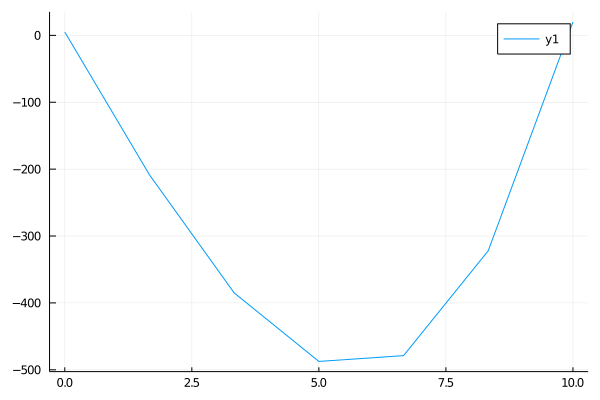

In [195]:
n=7 # Numero de intervalos + 1

y_inicial=5 # y(0) = 5
y_final=20 # y(10) = 20
x_inicial=0 # x1 = 0
x_final=10 # x7 = 10
h=(x_final-x_inicial)/(n-1)
x=zeros(n,1)
for i=1:(n)
    x[i]=x_inicial+h*(i-1)
end
for i=1:(n-2) 
    sd[i]=4*x[i+1] # calculamos as derivadas tal que y''(x) = 4x
end
x_bom=x
y_meio=diferenças_finitas(n,sd,y_inicial,y_final,x_inicial, x_final)
y_bom=[y_inicial;y_meio;y_final]

plot(x_bom, y_bom)

In [196]:
println(x_bom)
println(y_bom)

[0.0; 1.6666666666666667; 3.3333333333333335; 5.0; 6.666666666666667; 8.333333333333334; 10.0]
[5.0, -208.5493827160494, -385.0617283950617, -487.50000000000006, -478.82716049382725, -322.0061728395063, 20.0]


# Exercício 2c)

Com a função em mãos, podemos calcular os pontos do exercício:

In [218]:
println(x_bom)
println(y_bom)

[0.0; 1.6666666666666667; 3.3333333333333335; 5.0; 6.666666666666667; 8.333333333333334; 10.0]
[5.0, -208.5493827160494, -385.0617283950617, -487.50000000000006, -478.82716049382725, -322.0061728395063, 20.0]


Para este exercício, utilizaremos a técnica da Interpolação Polinomial de Grau 2 para calcular uma aproximação de $y(3.2345)$. Utilizaremos então um conjunto de pontos afim de montar o sistema de equações que resultará na matriz de Vandermonde para encontrarmos uma função aproximada que nos dará o valor de $y(3.2345)$.

Podemos tirar uma aproximação da função próxima de um polinômio de grau 2 utilizando 2 valores já obtidos, como os descrito acima. Com isto, teremos uma função que passa pelos pontos $(x_{1},y_{1}),(x_{2},y_{2}), (x_{3},y_{3})$ e que nos dará um polinômio na forma 

$$P = c_{2}x^2 + c_{1}x + c_{0}$$

$$
\begin{cases}
c_{2}x_{0}^2 + c_{1}x_{0} + c_{0} = y_{0} \\
c_{2}x_{1}^2 + c_{1}x_{1} + c_{0} = y_{1} \\
c_{2}x_{2}^2 + c_{1}x_{2} + c_{0} = y_{2} \\
\end{cases}
$$

Usaremos então os pontos $(0, 5.0),(5,-487.5)$ e $(10, 20.0)$. Portanto, temos que 

\begin{cases}
c_{2}0^2 + c_{1}0 + c_{0} = 5 \\
c_{2}5^2 + c_{1}5 + c_{0} = -487.5 \\
c_{2}10^2 + c_{1}10 + c_{0} = 20 \\
\end{cases}

Realizando as conversões necessárias para exp, temos que, com isto, podemos modelar as matrizes da seguinte forma

$$
V = \begin{bmatrix}
1 & 0 & 0^2  \\
1 & 5 & 5^2 \\
1 & 10 & 10^2 \\
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
5 \\
-487.5 \\
20 \\
\end{bmatrix}
$$

$$
C = \begin{bmatrix}
c_{0} \\
c_{1} \\
c_{2} \\
\end{bmatrix}
$$

Devemos então resolver o sistema tal que $V \cdot c = y$. Vamos então utilizar o método interpolacao descrito abaixo para resolver o sistema, retornando os coeficientes do polinômio de grau 2.

In [227]:
function interpolacao()
    # Cria a matriz V
    x = [0; 5; 10]
    y = [5; -487.5; 20]
    V=[x.^0 x.^1 x.^2]
    c=V\y # Resolve o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolacao (generic function with 1 method)

Com isto, podemos chamar a função interpolacao() para gerar a função que passará pelos pontos que queremos. Após isto, podemos usar a função para calcular $y(3.2345)$

In [231]:
coefs = interpolacao()
p = Polynomial(coefs)
println(p(3.2345))

-427.808445


# Exercício 3a)


Temos, como informado na questão, que a temperatura de cada vértice no interior do lago, ou seja x1,x2,x3,x4, é igual a média das temperaturas dos 4 vértices vizinhos.
Assim, podemos inferir os dados abaixo, formando um sistema de Ax =b 
$$

\begin{cases}
x_1 = \frac{5 + 15 + x_2 + x_3}{4} \\
4*x_1 = 20 + x_2 + x_3 \\
4*x_1 - x_3 - x_2 = 20  \\
\end{cases}
$$

$$
\begin{cases}
 x_2 = \frac{35 + 15 + x_1 + x_4}{4}\\
 4*x_2 = 50 + x_1 + x_4\\
 4*x_2 - x_4 - x_1 = 50 \\
\end{cases}
$$

$$
\begin{cases}
 x_3 = \frac{5 + 10 + x_1 + x_4}{4}\\
 4*x_3 = 15 + x_1 + x_4\\
 4*x_3 - x_1 - x_4 = 15 \\
\end{cases}
$$

$$
\begin{cases}
 x_4 = \frac{10 + 35 + x_2 + x_3}{4}\\
  4*x_4 = 45 + x_2 + x_3\\
 4*x_4 - x_2 - x_3 = 45 \\
\end{cases}
$$
Agora iremos transformar esse sistema de equações em um sistema matricial.

$$
\begin{pmatrix}4& -1 & -1 & 0 \\\\ 
-1 & 4 & 0 & -1 \\\\ 
-1 & 0 & 4 & -1 \\\\ 
0 & -1 & -1 & 4
\end{pmatrix} 
\times 
\begin{pmatrix} 
    x_1 \\\\
    x_2 \\\\ 
    x_3 \\\\ 
    x_4 \\\\ 
\end{pmatrix} = 
\begin{pmatrix}
    20 \\\\
    50 \\\\ 
    15 \\\\ 
    45 \\\\
\end{pmatrix}
$$

# Exercício 3b)

In [240]:
A = [4.0 -1.0 -1.0 0; -1.0 4.0 0 -1.0; -1.0 0 4.0 -1.0; 0 -1.0 -1.0 4.0]
b = [20.0; 50.0; 15.0; 45.0]
x_calculado = sistema_denso(A,b)

4×1 Array{Float64,2}:
 13.125
 20.625
 11.874999999999998
 19.375

# Exercício 3c)

De modo similar a questão anterior, montamos os sistemas baseados em $x$ para as 25 varíaveis do problema descrito.

$$

\begin{cases}
x_1 = \frac{20 + 25 + x_6 + x_2}{4} \\
4*x_1 = 55 + x_6 + x_2 \\
4*x_1 - x_6 - x_2 = 55  \\
\end{cases}
$$

$$
\begin{cases}
 x_2 = \frac{20 + x_1 + x_7 + x_3}{4}\\
 4*x_2 = 20 + x_1 + x_7 + x_3\\
 4*x_2 - x_1 - x_7 - x_3 = 20 \\
\end{cases}
$$

$$
\begin{cases}
 x_3 = \frac{20 + x_4 + x_8 + x_2}{4}\\
 4*x_3 = 20 + x_4 + x_8 + x_2\\
 4*x_3 - x_4 - x_8 - x_2 = 20 \\
\end{cases}
$$


$$
\begin{cases}
 x_4 = \frac{20 + x_5 + x_9 + x_3}{4}\\
 4*x_4 = 20 + x_5 + x_9 + x_3\\
 4*x_4 - x_5 - x_9 - x_3 = 20 \\
\end{cases}
$$


$$
\begin{cases}
 x_5 = \frac{20 + 20 + x_{10} + x_4}{4}\\
 4*x_5 = 40 + x_{10} + x_4\\
 4*x_5 - x_{10} - x_4 = 40 \\
\end{cases}
$$

$$
\begin{cases}
 x_6 = \frac{x_1 + x_7 + x_{11} + 25}{4}\\
 4*x_6 = 25 + x_{1} + x_7 + x_{11}\\
 4*x_6 - x_{1} - x_7 - x_{11} = 25 \\
\end{cases}
$$

$$
\begin{cases}
 x_7 = \frac{x_2 + x_8 + x_{12} + x_6}{4}\\
 4*x_7 = x_2 + x_{8} + x_{12} + x_6\\
 4*x_7 - x_{2} - x_8 - x_{12} - x_6 = 0 \\
\end{cases}
$$

$$
\begin{cases}
 x_8 = \frac{x_3 + x_9 + x_{13} + x_7}{4}\\
 4*x_8 = x_3 + x_{9} + x_{13} + x_7\\
 4*x_8 - x_{3} - x_9 - x_{13} - x_7 = 0 \\
\end{cases}
$$

$$
\begin{cases}
 x_9 = \frac{x_4 + x_{10} + x_{14} + x_8}{4}\\
 4*x_9 = x_4 + x_{10} + x_{14} + x_8 \\
 4*x_9 - x_{4} - x_{10} - x_{14} - x_8 = 0 \\
\end{cases}
$$

$$
\begin{cases}
 x_{10} = \frac{x_5 + 20 + x_{15} + x_9}{4}\\
 4*x_{10} = x_5 + 20 + x_{15} + x_9\\
 4*x_{10} - x_{5} - x_{15} - x_9 = 20 \\
\end{cases}
$$

$$
\begin{cases}
 x_{11} = \frac{x_6 + x_{12} + x_{16} + 25}{4}\\
 4*x_{11} = 25 + x_{6} + x_{10} + x_{12}\\
 4*x_{11} - x_{6} - x_{10} - x_{12} = 25 \\
\end{cases}
$$

$$
\begin{cases}
 x_{12} = \frac{x_7 + x_{13} + x_{17} + x_1}{4}\\
 4*x_{12} = x_7 + x_{13} + x_{17} + x_1\\
 4*x_{12} - x_{7} - x_{13} - x_{17} - x_1 = 0 \\
\end{cases}
$$

$$
\begin{cases}
 x_{13} = \frac{x_8 + x_{14} + x_{18} + x_{12}}{4}\\
 4*x_{13} = x_8 + x_{14} + x_{18} + x_{12}\\
 4*x_{13} - x_{8} - x_{14} - x_{18} - x_{12} = 0 \\
\end{cases}
$$

$$
\begin{cases}
 x_{14} = \frac{x_{9} + x_{15} + x_{19} + x_{13}}{4}\\
 4*x_{14} = x_{9} + x_{15} + x_{19} + x_{13}\\
 4*x_{14} - x_{9} - x_{15} - x_{19} - x_{13} = 0 \\
\end{cases}
$$

$$
\begin{cases}
 x_{15} = \frac{x_{10} + 20 + x_{20} + x_{14}}{4}\\
 4*x_{15} = 20 + x_{10} + x_{20} + x_{14}\\
 4*x_{15} - x_{10} - x_{20} - x_{14} = 20 \\
\end{cases}
$$

$$
\begin{cases}
 x_{16} = \frac{x_{11} + x_{17} + x_{21} + 25}{4}\\
 4*x_{16} = 25 + x_{11} + x_{17} + x_{21}\\
 4*x_{16} - x_{11} - x_{17} - x_{21} = 25 \\
\end{cases}
$$

$$
\begin{cases}
 x_{17} = \frac{x_{12} + x_{18} + x_{22} + x_{16}}{4}\\
 4*x_{17} = x_{12} + x_{18} + x_{22} + x_{16}\\
 4*x_{17} - x_{12} - x_{18} - x_{22} - x_{16} = 0 \\
\end{cases}
$$

$$
\begin{cases}
 x_{18} = \frac{x_{13} + x_{19} + x_{23} + x_{17}}{4}\\
 4*x_{18} = x_{13} + x_{19} + x_{23} + x_{17}\\
 4*x_{18} - x_{13} - x_{19} - x_{23} - x_{17} = 0 \\
\end{cases}
$$

$$
\begin{cases}
 x_{19} = \frac{x_{14} + x_{20} + x_{24} + x_{18}}{4}\\
 4*x_{19} = x_{14} + x_{20} + x_{24} + x_{18}\\
 4*x_{19} - x_{14} - x_{20} - x_{24} - x_{18} = 0 \\
\end{cases}
$$

$$
\begin{cases}
 x_{20} = \frac{x_{15} + 20 + x_{25} + x_{19}}{4}\\
 4*x_{20} = 20 + x_{15} + x_{25} + x_{19}\\
 4*x_{20} - x_{15} - x_{25} - x_{19} = 20 \\
\end{cases}
$$

$$
\begin{cases}
 x_{21} = \frac{x_{16} + x_{22} + 30 + 25}{4}\\
 4*x_{21} = 40 + 25 + x_{16} + x_{22}\\
 4*x_{21} - x_{16} - x_{22} = 65 \\
\end{cases}
$$

$$
\begin{cases}
 x_{22} = \frac{x_{17} + x_{23} + 30 + x_{21}}{4}\\
 4*x_{22} = 30 + x_{17} + x_{23} + x_{21}\\
 4*x_{22} - x_{17} - x_{23} - x_{21} = 30 \\
\end{cases}
$$

$$
\begin{cases}
 x_{23} = \frac{x_{18} + x_{24} + 30 + x_{22}}{4}\\
 4*x_{23} = 30 + x_{18} + x_{24} + x_{22}\\
 4*x_{23} - x_{18} - x_{24} - x_{22} = 30 \\
\end{cases}
$$

$$
\begin{cases}
 x_{24} = \frac{x_{19} + x_{25} + 30 + x_{23}}{4}\\
 4*x_{24} = 30 + x_{19} + x_{25} + x_{23}\\
 4*x_{24} - x_{19} - x_{25} - x_{23} = 30 \\
\end{cases}
$$

$$
\begin{cases}
 x_{25} = \frac{x_{20} + 20 + 30 + x_{24}}{4}\\
 4*x_{25} = 20 + 30 + x_{20} + x_{24}\\
 4*x_{25} - x_{20} - x_{24} = 50 \\
\end{cases}
$$





Com isto, podemos montar o sistema linear correspondente tal que

$$
\begin{bmatrix}
4& -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

-1& 4 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

0 & -1 & 4 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & -1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

0& 0 & 0 & -1 & 4 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

-1& 0 & 0 & 0 & 0 & 4 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

0 & -1 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

0& 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

-1 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 4 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 4 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & -1 & 0 & 0  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & -1 & 0  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & 0 & 0 & 0 & 0 & -1  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 4 & -1 & 0 & 0 & 0  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & -1 & 0  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4 & -1  \\\\

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 4  \\\\
\end{bmatrix} 

\times
 
\begin{bmatrix} 
    x_1 \\\\
    x_2 \\\\ 
    x_3 \\\\ 
    x_4 \\\\
    x_5 \\\\ 
    x_6 \\\\ 
    x_7 \\\\ 
    x_8 \\\\ 
    x_9 \\\\ 
    x_10 \\\\ 
    x_11 \\\\ 
    x_12 \\\\ 
    x_13 \\\\ 
    x_14 \\\\ 
    x_15 \\\\ 
    x_16 \\\\ 
    x_17 \\\\ 
    x_18 \\\\ 
    x_19 \\\\ 
    x_20 \\\\ 
    x_21 \\\\ 
    x_22 \\\\
    x_23 \\\\ 
    x_24 \\\\ 
    x_25 \\\\ 
\end{bmatrix} = 
\begin{bmatrix}
    55 \\\\
    20 \\\\ 
    20 \\\\ 
    20 \\\\
    40 \\\\
    25 \\\\
    0 \\\\
    0 \\\\
    0 \\\\
    20 \\\\
    25 \\\\
    0 \\\\
    0 \\\\
    0 \\\\
    20 \\\\
    25 \\\\
    0 \\\\
    0 \\\\
    0 \\\\
    20 \\\\
    65 \\\\
    30 \\\\
    30 \\\\
    30 \\\\
    50 \\\\
\end{bmatrix}
$$

In [230]:
A = [4.0 -1.0  0  0  0  -1.0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0;-1.0 4.0  -1.0  0  0  0  -1.0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0;0  -1.0  4.0  -1.0  0  0  0  -1.0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0;0  0  -1.0  4.0  -1.0  0  0  0  -1.0  -1.0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0;0 0  0  -1.0  4.0  0  0  0  0  -1.0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0;-1.0 0  0  0  0  4.0  -1.0  0  0  0  -1.0  0  0  0  0  0  0  0  0  0  0  0  0  0  0;0  -1.0  0  0  0  -1.0  4.0  -1.0  0  0  0  -1.0  0  0  0  0  0  0  0  0  0  0  0  0  0;0  0  -1.0  0  0  0  -1.0  4.0  -1.0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0;0 0  0  -1.0  0  0  0  -1.0  4.0  -1.0  0  0  0  -1.0  0  0  0  0  0  0  0  0  0  0  0;0  0  0  0  -1.0  0  0  0  -1.0  4.0  0  0  0  0  -1.0  0  0  0  0  0  0  0  0  0  0;0  0  0  0  0  -1.0  0  0  0  -1.0  4.0  -1.0  0  0  0  0  0  0  0  0  0  0  0  0  0;-1.0  0  0  0  0  0  -1.0  0  0  0  0  4.0  -1.0  0  0  0  -1.0  0  0  0  0  0  0  0  0;0  0  0  0  0  0  0  -1.0  0  0  0  -1.0  4.0  -1.0  0  0  0  -1.0  0  0  0  0  0  0  0;0  0  0  0  0  0  0  0  -1.0  0  0  0  -1.0  4.0  -1.0  0  0  0  -1.0  0  0  0  0  0  0;0  0  0  0  0  0  0  0  0  -1.0  0  0  0  -1.0  4.0  0  0  0  0  -1.0  0  0  0  0  0;0  0  0  0  0  0  0  0  0  0  -1.0  0  0  0  0  4.0  -1.0  0  0  0  -1.0  0  0  0  0;0  0  0  0  0  0  0  0  0  0  0  -1.0  0  0  0  -1.0  4.0  -1.0  0  0  0  -1.0  0  0  0;0  0  0  0  0  0  0  0  0  0  0  0  -1.0  0  0  0  -1.0  4.0  -1.0  0  0  0  -1.0  0  0;0  0  0  0  0  0  0  0  0  0  0  0  0  -1.0  0  0  0  -1.0  4.0  -1.0  0  0  0  -1.0  0;0  0  0  0  0  0  0  0  0  0  0  0  0  0  -1.0  0  0  0  -1.0  4.0  0  0  0  0  -1.0;0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  -1.0  0  0  0  0  4.0  -1.0  0  0  0;0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  -1.0  0  0  0  -1.0  4.0  -1.0  0  0;0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  -1.0  0  0  0  -1.0  4.0  -1.0  0;0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  -1.0  0  0  0  -1.0  4.0  -1.0;0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  -1.0  0  0  0  -1.0  4.0;]
b = [55 ;20 ;20 ; 20 ;40 ;25 ;0 ;0 ;0 ;20 ;25 ;0 ;0 ;0 ;20 ;25 ;0 ;0 ;0 ;20 ;65 ;30 ;30 ;30 ;50 ]
x_calculado = sistema_denso(A,b)

25×1 Array{Float64,2}:
 25.11379958100669
 21.820476452863225
 21.013471949341554
 26.352829727867302
 21.879291290779683
 23.634721871163535
 21.15463428110466
 15.88058161663569
 21.354220236096545
 21.164335435251427
  ⋮
 25.4411841048166
 24.50317010736364
 23.877075440204198
 22.511851256634756
 29.744702282036638
 28.114724125797547
 27.273010116336955
 26.474146232186627
 24.746499372205342

# Exercício 3d)



# Exercício 4a)

# Exercício 4b)